In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chardet

In [38]:
import warnings
warnings.filterwarnings(action = 'ignore')

sns.set_theme(style = 'whitegrid')

pd.options.display.max_columns = 30
pd.options.display.float_format = '{:,.2f}'.format

Для формирования дата-фрейма из csv-файла определем его кодировку:

In [40]:
def detect_encoding(file_path):
    with open(file_path, 'rb') as file:
        detector = chardet.universaldetector.UniversalDetector()
        for line in file:
            detector.feed(line)
            if detector.done:
                break
        detector.close()
    return detector.result['encoding']

In [41]:
detect_encoding('Global YouTube Statistics.csv')

'ISO-8859-1'

Прочитаем файл в дата-фрейм с указанием кодировки:

In [43]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding = 'ISO-8859-1')

Унифицируем названия столбцов для удобства:

In [45]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [46]:
df.head()

,rank,youtuber,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment_(%),population,unemployment_rate,urban_population,latitude,longitude
0,1,T-Series,245000000,"228,000,000,000.00",Music,T-Series,20082,India,IN,Music,1.00,1.00,1.00,"2,258,000,000.00","564,600.00","9,000,000.00","6,800,000.00","108,400,000.00","2,000,000.00","2,006.00",Mar,13.00,28.10,"1,366,417,754.00",5.36,"471,031,528.00",20.59,78.96
1,2,YouTube Movies,170000000,0.00,Film & Animation,youtubemovies,1,United States,US,Games,"4,055,159.00","7,670.00","7,423.00",12.00,0.00,0.05,0.04,0.58,NaN,"2,006.00",Mar,5.00,88.20,"328,239,523.00",14.70,"270,663,028.00",37.09,-95.71
2,3,MrBeast,166000000,"28,368,841,870.00",Entertainment,MrBeast,741,United States,US,Entertainment,48.00,1.00,1.00,"1,348,000,000.00","337,000.00","5,400,000.00","4,000,000.00","64,700,000.00","8,000,000.00","2,012.00",Feb,20.00,88.20,"328,239,523.00",14.70,"270,663,028.00",37.09,-95.71
3,4,Cocomelon - Nursery Rhymes,162000000,"164,000,000,000.00",Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.00,2.00,1.00,"1,975,000,000.00","493,800.00","7,900,000.00","5,900,000.00","94,800,000.00","1,000,000.00","2,006.00",Sep,1.00,88.20,"328,239,523.00",14.70,"270,663,028.00",37.09,-95.71
4,5,SET India,159000000,"148,000,000,000.00",Shows,SET India,116536,India,IN,Entertainment,3.00,2.00,2.00,"1,824,000,000.00","455,900.00","7,300,000.00","5,500,000.00","87,500,000.00","1,000,000.00","2,006.00",Sep,20.00,28.10,"1,366,417,754.00",5.36,"471,031,528.00",20.59,78.96


# Задание 1. EDA

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video_views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   country                                  873 non-null    object 
 8   abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [49]:
df.describe()

,rank,subscribers,video_views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,gross_tertiary_education_enrollment_(%),population,unemployment_rate,urban_population,latitude,longitude
count,995.00,995.00,995.00,995.00,994.00,879.00,962.00,939.00,995.00,995.00,995.00,995.00,658.00,990.00,990.00,872.00,872.00,872.00,872.00,872.00,872.00
mean,498.00,"22,982,412.06","11,039,537,052.04","9,187.13","554,248.90",386.05,745.72,"175,610,284.79","36,886.15","589,807.85","442,257.39","7,081,813.92","349,079.13","2,012.63",15.75,63.63,"430,387,266.75",9.28,"224,214,981.63",26.63,-14.13
std,287.38,"17,526,105.34","14,110,844,376.83","34,151.35","1,362,782.21","1,232.24","1,944.39","416,378,166.21","71,858.72","1,148,622.48","861,216.10","13,797,037.61","614,355.44",4.51,8.78,26.11,"472,794,722.46",4.89,"154,687,362.71",20.56,84.76
min,1.00,"12,300,000.00",0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,"1,970.00",1.00,7.60,"202,506.00",0.75,"35,588.00",-38.42,-172.10
25%,249.50,"14,500,000.00","4,288,145,410.00",194.50,323.00,11.00,27.00,"20,137,500.00","2,700.00","43,500.00","32,650.00","521,750.00","100,000.00","2,009.00",8.00,36.30,"83,355,411.00",5.27,"55,908,316.00",20.59,-95.71
50%,498.00,"17,700,000.00","7,760,819,588.00",729.00,915.50,51.00,65.50,"64,085,000.00","13,300.00","212,700.00","159,500.00","2,600,000.00","200,000.00","2,013.00",16.00,68.00,"328,239,523.00",9.37,"270,663,028.00",37.09,-51.93
75%,746.50,"24,600,000.00","13,554,701,853.00","2,667.50","3,584.50",123.00,139.75,"168,826,500.00","37,900.00","606,800.00","455,100.00","7,300,000.00","400,000.00","2,016.00",23.00,88.20,"328,239,523.00",14.70,"270,663,028.00",37.09,78.96
max,995.00,"245,000,000.00","228,000,000,000.00","301,308.00","4,057,944.00","7,741.00","7,741.00","6,589,000,000.00","850,900.00","13,600,000.00","10,200,000.00","163,400,000.00","8,000,000.00","2,022.00",31.00,113.10,"1,397,715,000.00",14.72,"842,933,962.00",61.92,138.25


Ярко выраженных выбросов в данных не наблюдается.

<tr>Видно, что есть атрибуты, которые являются излишними или дополняют друг друга:
    <li>country (страна) и abbreviation (аббревиатура страны);</li>
    <li>youtuber (наименование канала) и title (заголовок канала);</li>
    <li>category (категория канала) и channel_type (тип канала);</li>
    <li>latitude (широта) и longitude (долгота).</li>
</tr>
Можно от них избавится:

In [52]:
df = df.drop(columns = ['abbreviation', 'title', 'channel_type', 'latitude', 'longitude'], axis = 1)

Посмотрим на процент не заполненных значений по столбцам:

In [54]:
df.isna().mean()*100

rank                                       0.00
youtuber                                   0.00
subscribers                                0.00
video_views                                0.00
category                                   4.62
uploads                                    0.00
country                                   12.26
video_views_rank                           0.10
country_rank                              11.66
channel_type_rank                          3.32
video_views_for_the_last_30_days           5.63
lowest_monthly_earnings                    0.00
highest_monthly_earnings                   0.00
lowest_yearly_earnings                     0.00
highest_yearly_earnings                    0.00
subscribers_for_last_30_days              33.87
created_year                               0.50
created_month                              0.50
created_date                               0.50
gross_tertiary_education_enrollment_(%)   12.36
population                              

Удалим строки, в которых процент не заполненных значений не превышает 1%:

In [56]:
df = df.drop(
    index = df[(df['video_views_rank'].isna()) | (df['created_year'].isna()) | (df['created_month'].isna()) | (df['created_date'].isna())].index
)

## Статистика по пустым значениям в столбцах:

In [58]:
import missingno as msno

Кол-во пустых значений по столбцам:

<Axes: >

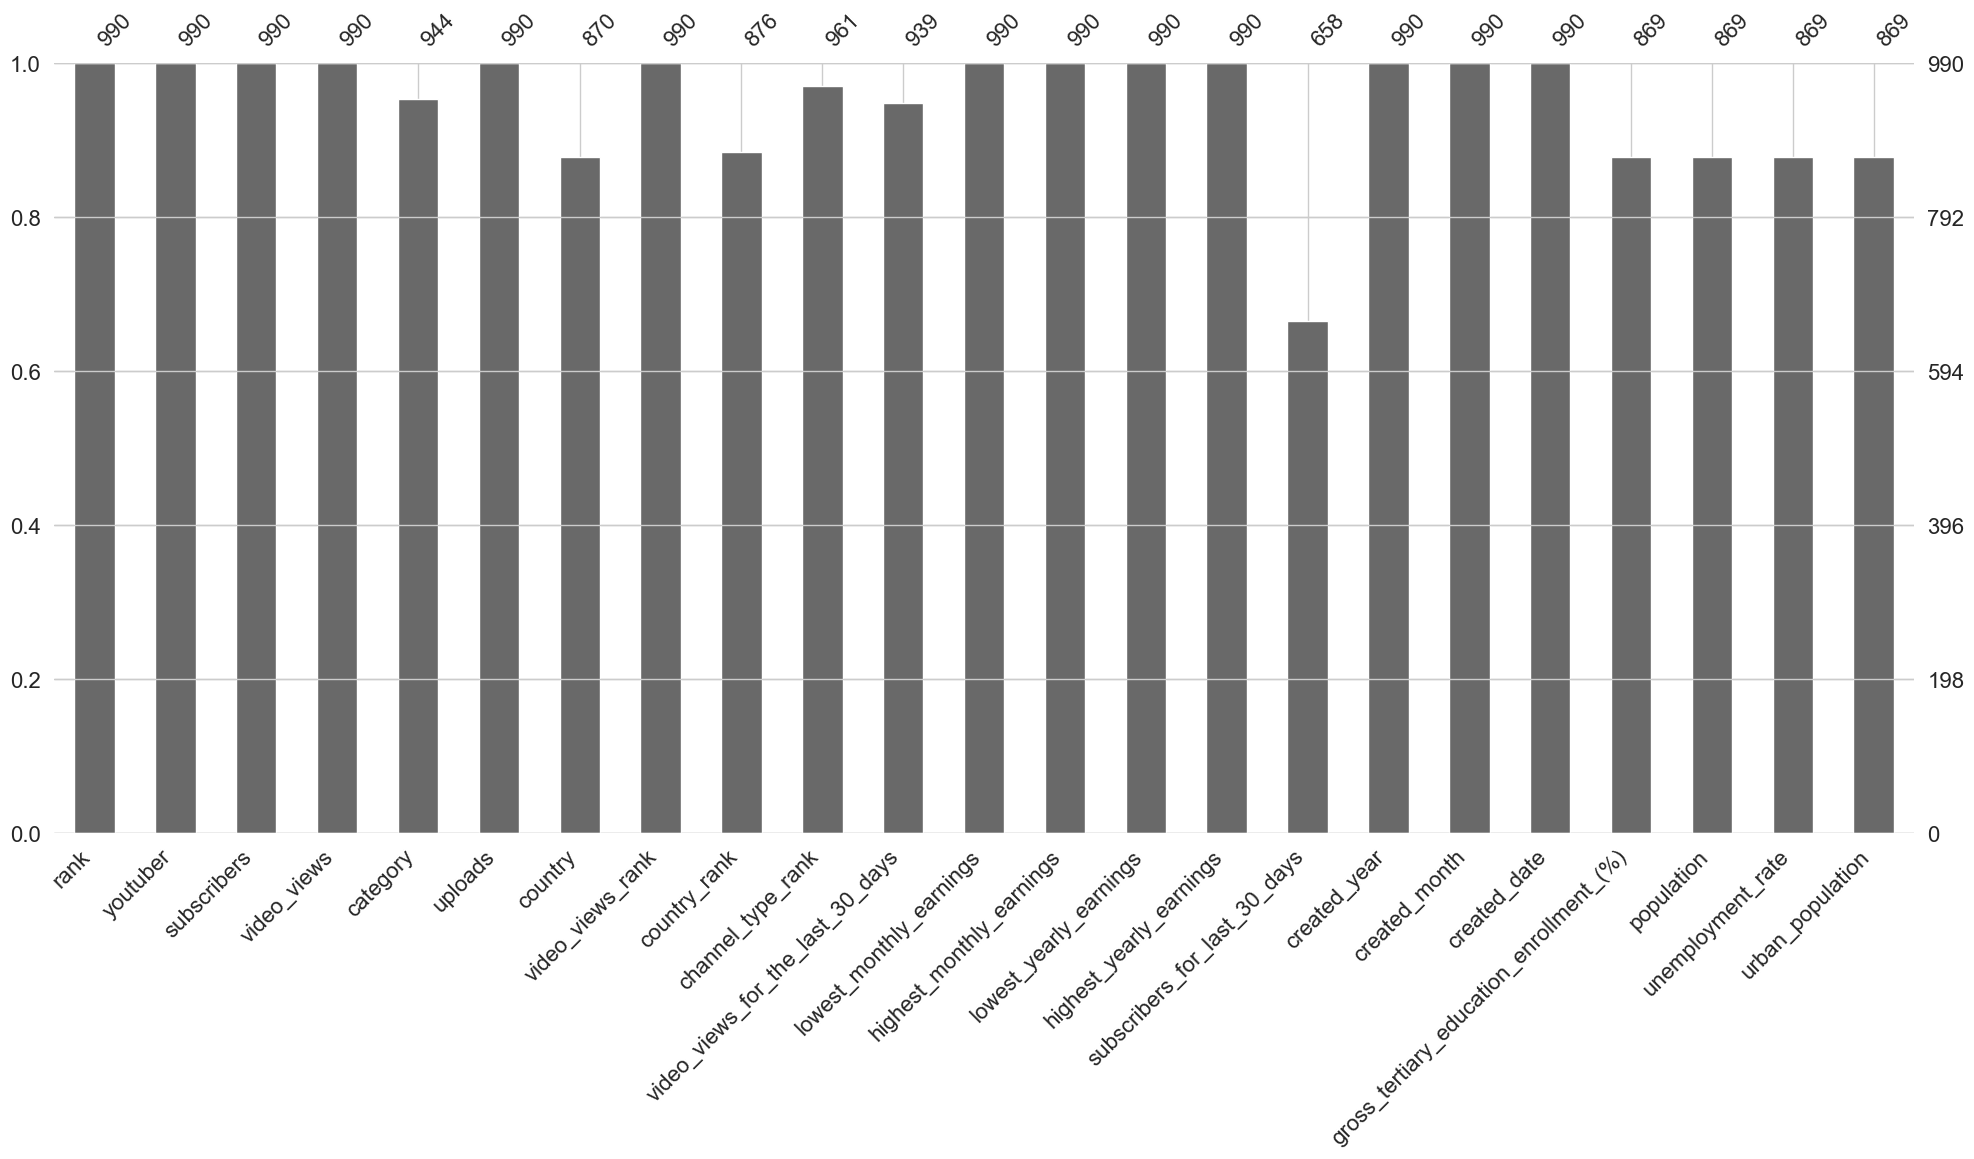

In [60]:
msno.bar(df)

Матрица пустых значений по столбцам:

<Axes: >

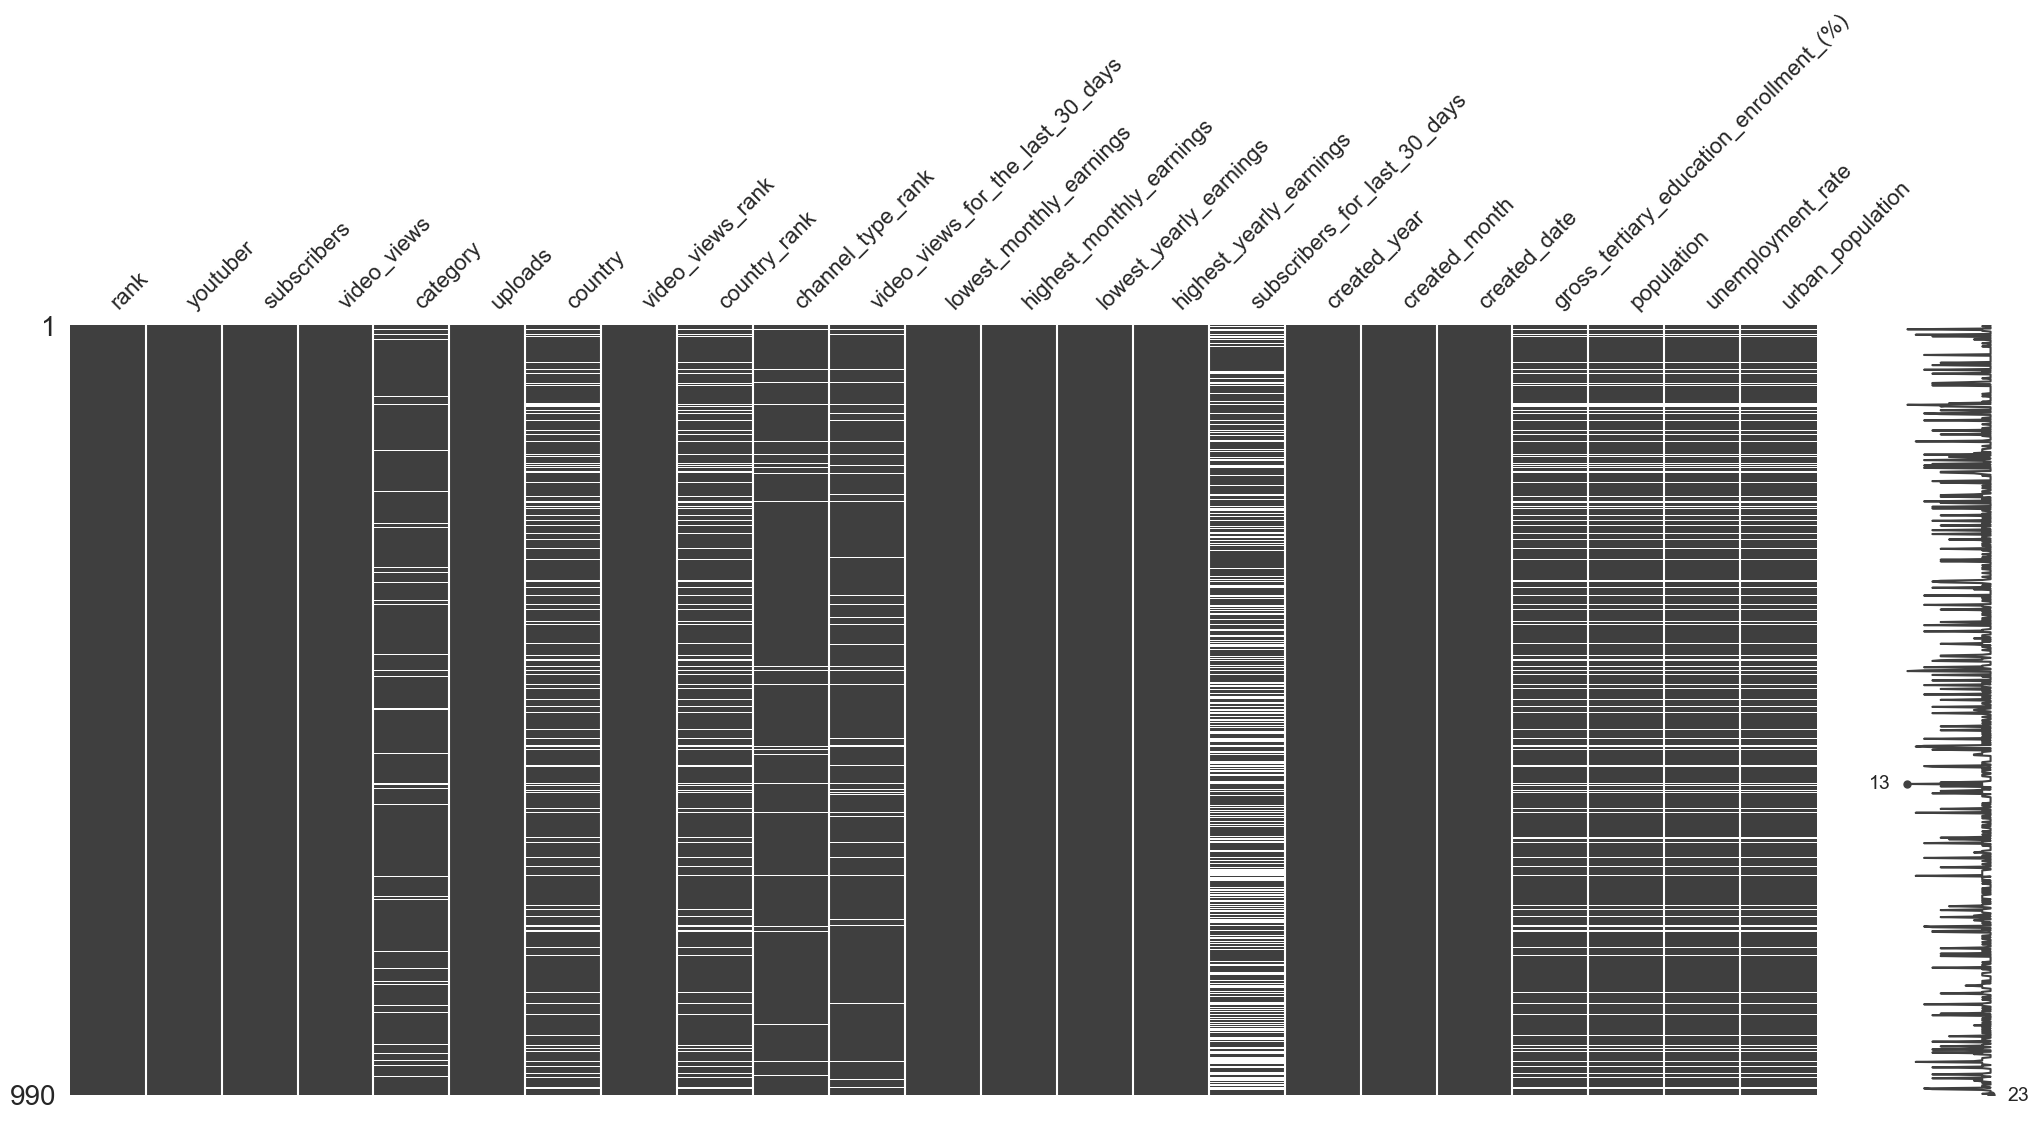

In [62]:
msno.matrix(df)

Взаимосвязь пустых значений по столбцам (-1 - противоположная связь; 0 - связи нет; 1 - прямая связь):

<Axes: >

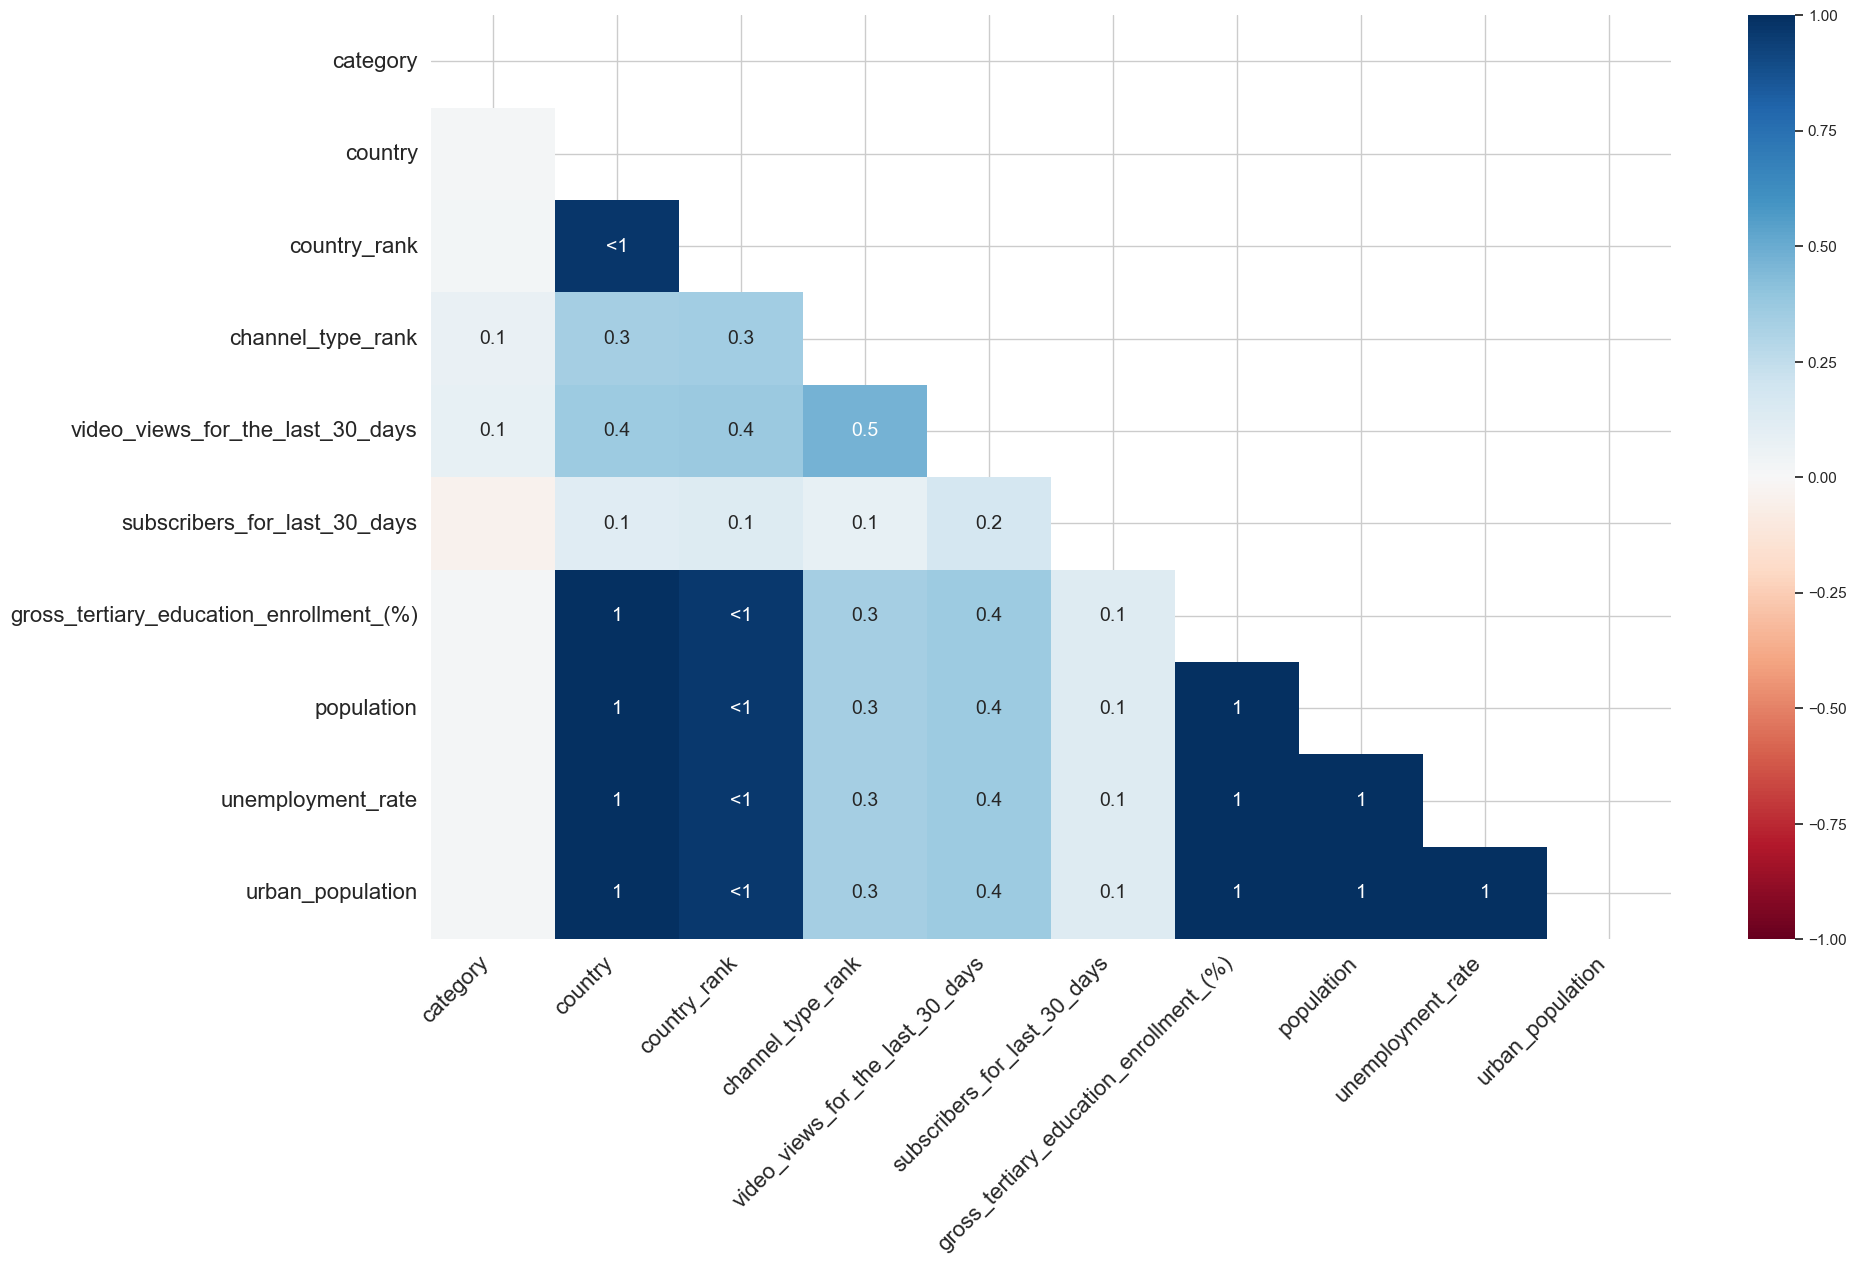

In [64]:
msno.heatmap(df)

Дендрограмма взаимосвязи по пропускам:

<Axes: >

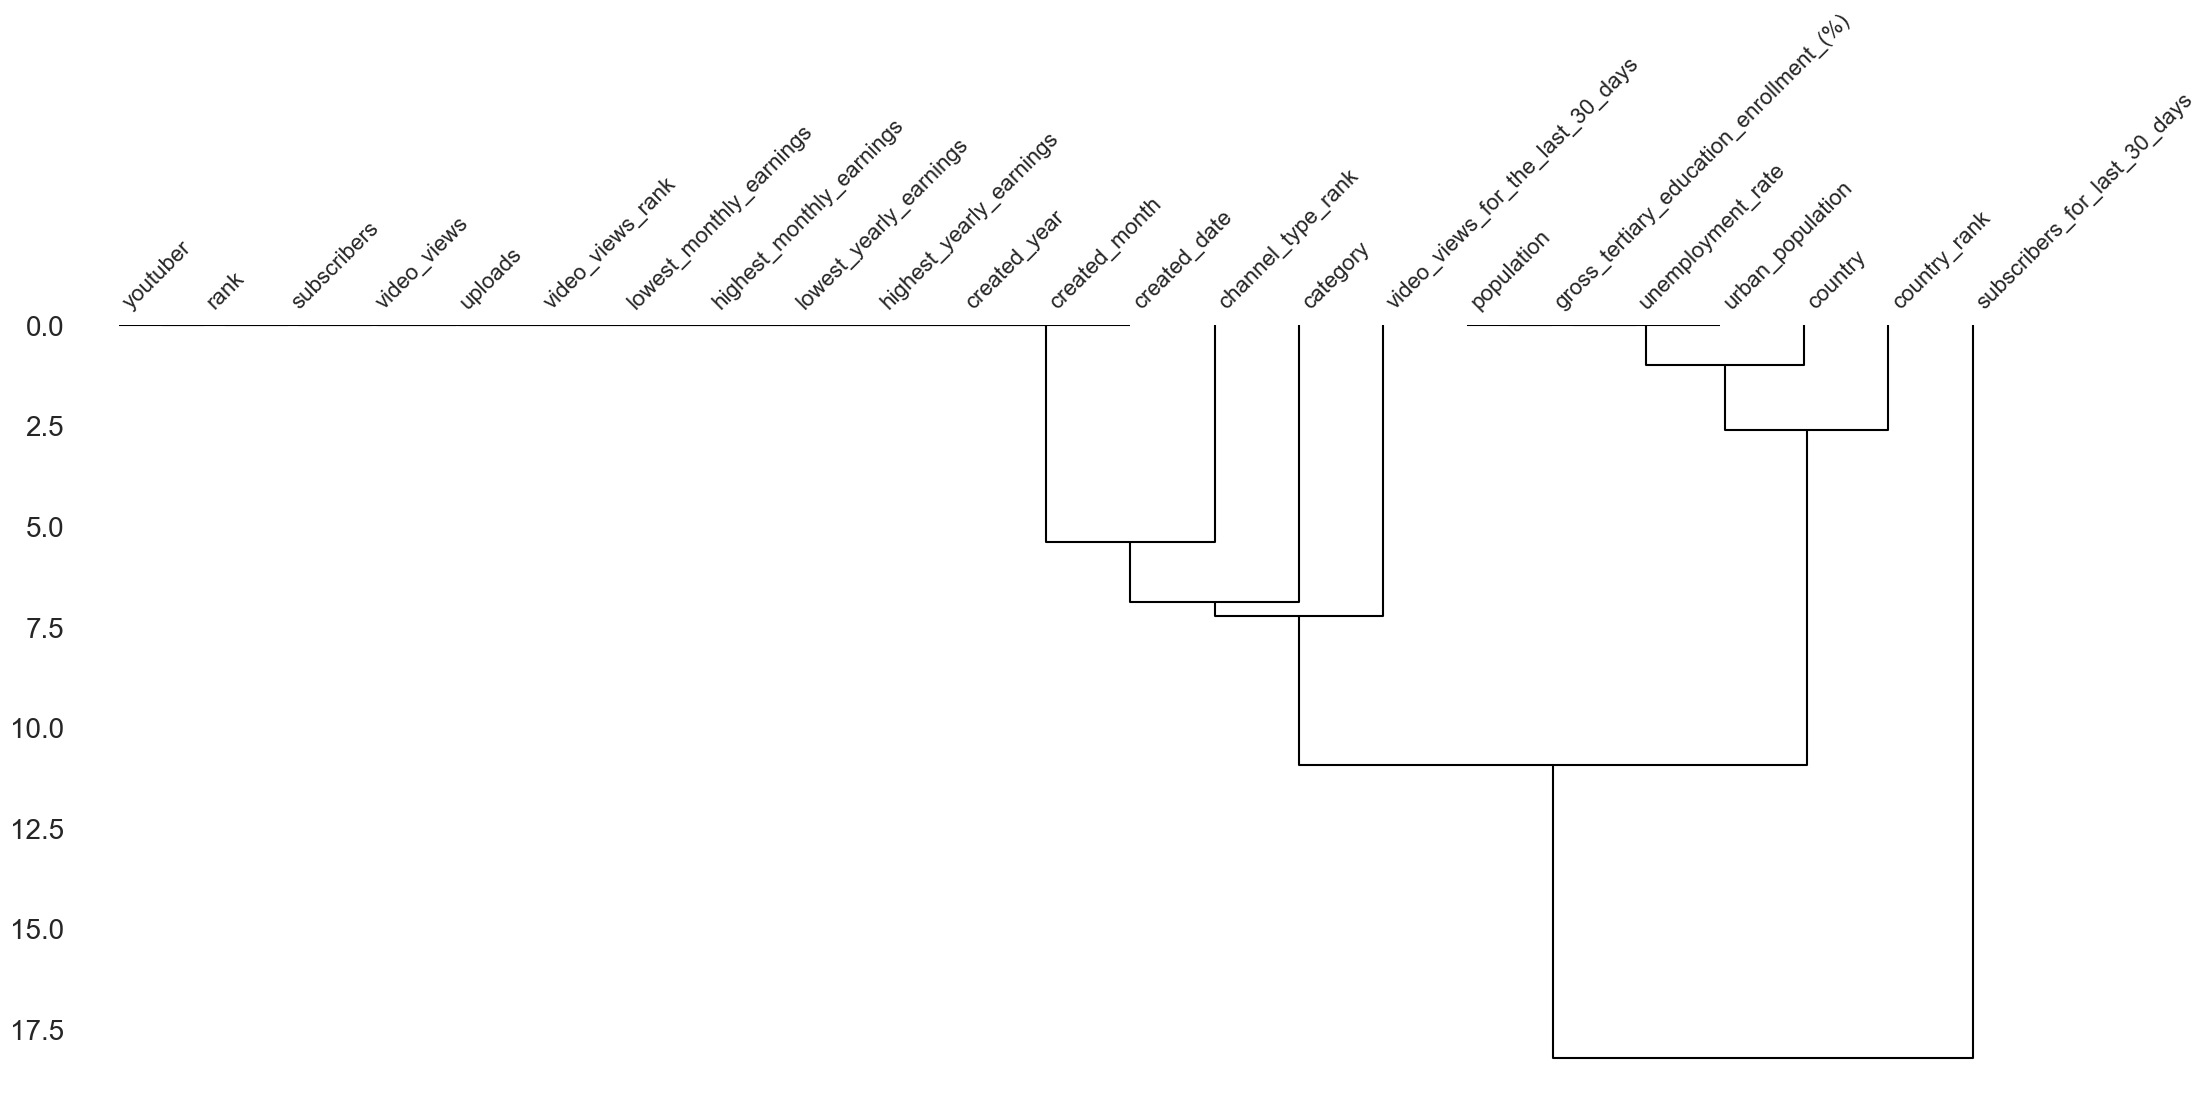

In [66]:
msno.dendrogram(df)

Среди столбцов с не заполненными значениями есть категориальные: *category* и *country*.<br/>
Заполнить их через другие атрибуты не представляется возможным. Поэтому оставим пустые значения.

Остальные атрибуты непрерывные. Будем заполнять средней или медианой.

Атрибуты *gross_tertiary_education_enrollment_(%)*, *population*, *unemployment_rate* и *urban_population* зависят только от атрибута *country*. Можно было бы заполнить одно на основании другого. Однако все атрибуты попарно не заполнены. Поэтому заполнять их нечем. Оставляем их пустыми.

Не заполненные значения *channel_type_rank*, *video_views_for_the_last_30_days*, *subscribers_for_last_30_days* можно заполнить в соответствии с категориальными атрибутами *country*, *category*.<br/>
Посмотрим на вид распределения признаков:

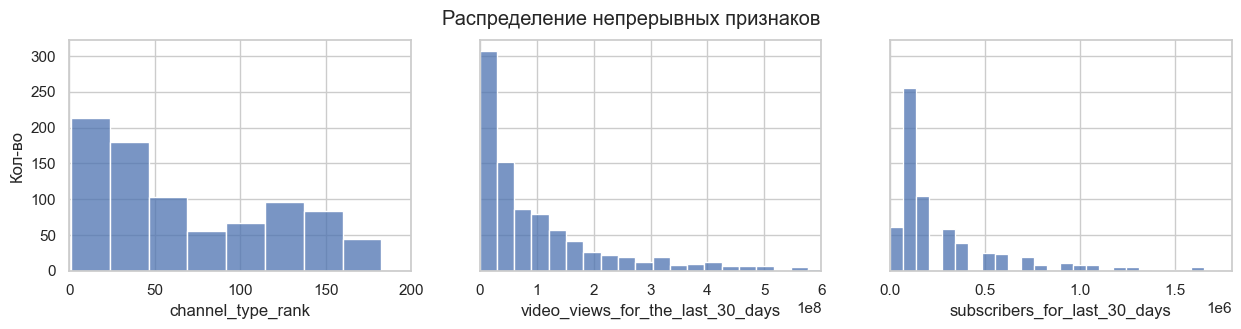

In [71]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 3), sharey = True)
fig.suptitle('Распределение непрерывных признаков')
ax[0].set_ylabel('Кол-во')
ax[0].set_xlim(0, 200)
ax[1].set_xlim(0, 0.6*10**9)
ax[2].set_xlim(0, 1.8*10**6)
sns.histplot(data = df, x = 'channel_type_rank', ax = ax[0])
sns.histplot(data = df, x = 'video_views_for_the_last_30_days', ax = ax[1])
sns.histplot(data = df, x = 'subscribers_for_last_30_days', ax = ax[2])
plt.show()

Видно, что распределение показателей не нормальное, присутствуют выбросы. Поэтому в качестве значения для замены будем использовать медиану:

In [73]:
df['channel_type_rank'].fillna(
    df.groupby(['country', 'category'])['channel_type_rank'].transform('median'),
    inplace = True)
df['video_views_for_the_last_30_days'].fillna(
    df.groupby(['country', 'category'])['video_views_for_the_last_30_days'].transform('median'),
    inplace = True)
df['subscribers_for_last_30_days'].fillna(
    df.groupby(['country', 'category'])['subscribers_for_last_30_days'].transform('median'),
    inplace = True)

In [74]:
df.isna().mean()*100

rank                                       0.00
youtuber                                   0.00
subscribers                                0.00
video_views                                0.00
category                                   4.65
uploads                                    0.00
country                                   12.12
video_views_rank                           0.00
country_rank                              11.52
channel_type_rank                          2.63
video_views_for_the_last_30_days           3.54
lowest_monthly_earnings                    0.00
highest_monthly_earnings                   0.00
lowest_yearly_earnings                     0.00
highest_yearly_earnings                    0.00
subscribers_for_last_30_days              10.71
created_year                               0.00
created_month                              0.00
created_date                               0.00
gross_tertiary_education_enrollment_(%)   12.22
population                              

Остальные пропущенные значения заполнить не представляется возможным.

## Однофакторный анализ:

Построим графики распределения для категориальных признаков:

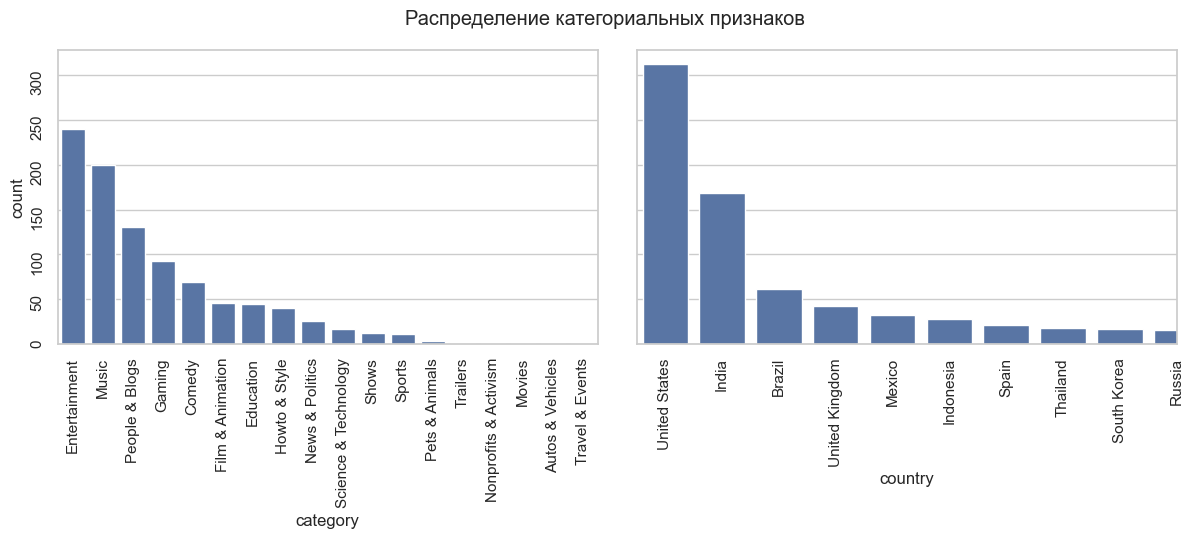

In [78]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (12, 4))
fig.suptitle('Распределение категориальных признаков', y = 0.95)
fig.tight_layout()
sns.countplot(data = df, x = 'category', ax = ax[0], order = df['category'].value_counts().index)
sns.countplot(data = df, x = 'country', ax = ax[1], order = df['country'].value_counts().index)
ax[0].tick_params(rotation = 90)
ax[1].tick_params(rotation = 90)
ax[1].set_xlim(right = 'Russia')
plt.show()

<tr>Из графиков видно, что наибольший объем данных представлен:
    <li>по развлекательным и музыкальным каналамканалам;</li>
    <li>по каналам из США и Индии;</li>
</tr>

Для непрерывных признаков:

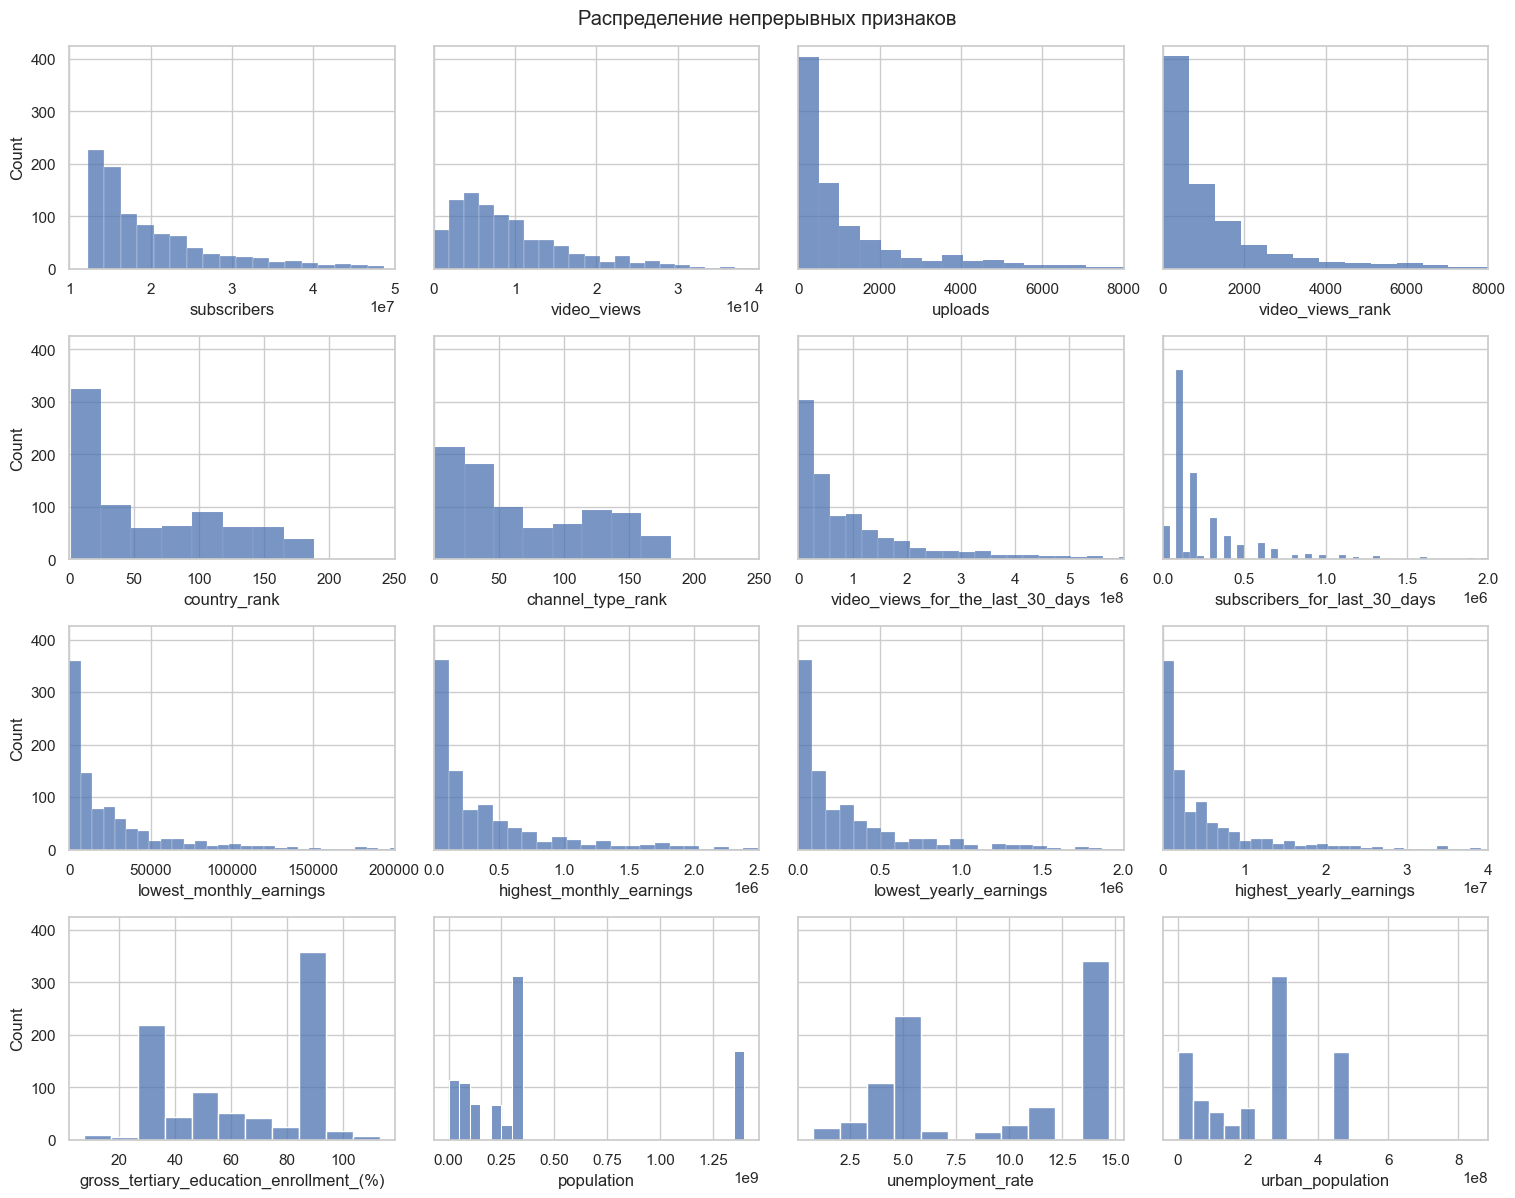

In [81]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, sharey = True, figsize = (15, 12))
plt.suptitle('Распределение непрерывных признаков')
fig.tight_layout()
plt.subplots_adjust(hspace = 0.3)

sns.histplot(data = df, x = 'subscribers', ax = ax[0, 0])
sns.histplot(data = df, x = 'video_views', ax = ax[0, 1])
sns.histplot(data = df, x = 'uploads', ax = ax[0, 2])
sns.histplot(data = df, x = 'video_views_rank', ax = ax[0, 3])
ax[0, 0].set_xlim(10**7, 0.5*10**8)
ax[0, 1].set_xlim(0, 0.4*10**11)
ax[0, 2].set_xlim(0, 0.8*10**4)
ax[0, 3].set_xlim(0, 0.8*10**4)

sns.histplot(data = df, x = 'country_rank', ax = ax[1, 0])
sns.histplot(data = df, x = 'channel_type_rank', ax = ax[1, 1])
sns.histplot(data = df, x = 'video_views_for_the_last_30_days', ax = ax[1, 2])
sns.histplot(data = df, x = 'subscribers_for_last_30_days', ax = ax[1, 3])
ax[1, 0].set_xlim(0, 250)
ax[1, 1].set_xlim(0, 250)
ax[1, 2].set_xlim(0, 0.6*10**9)
ax[1, 3].set_xlim(0, 2*10**6)

sns.histplot(data = df, x = 'lowest_monthly_earnings', ax = ax[2, 0])
sns.histplot(data = df, x = 'highest_monthly_earnings', ax = ax[2, 1])
sns.histplot(data = df, x = 'lowest_yearly_earnings', ax = ax[2, 2])
sns.histplot(data = df, x = 'highest_yearly_earnings', ax = ax[2, 3])
ax[2, 0].set_xlim(0, 2*10**5)
ax[2, 1].set_xlim(0, 0.25*10**7)
ax[2, 2].set_xlim(0, 0.2*10**7)
ax[2, 3].set_xlim(0, 0.4*10**8)

sns.histplot(data = df, x = 'gross_tertiary_education_enrollment_(%)', ax = ax[3, 0])
sns.histplot(data = df, x = 'population', ax = ax[3, 1])
sns.histplot(data = df, x = 'unemployment_rate', ax = ax[3, 2])
sns.histplot(data = df, x = 'urban_population', ax = ax[3, 3])

fig.show()

Из графиков распределений видно, что никакой из непрерывных показателей не распределен по нормальному закону. Больше похоже, что все показатели, кроме зависящих от города *country* (нижний ряд) убывают по экспоненциальному закону.

## Друхфакторный анализ:

Для выявления взаимосвязей между признаками построим матрицу корелляции между ними:

In [85]:
import phik
from phik.report import plot_correlation_matrix

interval columns not set, guessing: ['rank', 'subscribers', 'video_views', 'uploads', 'video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 'created_date', 'gross_tertiary_education_enrollment_(%)', 'population', 'unemployment_rate', 'urban_population']


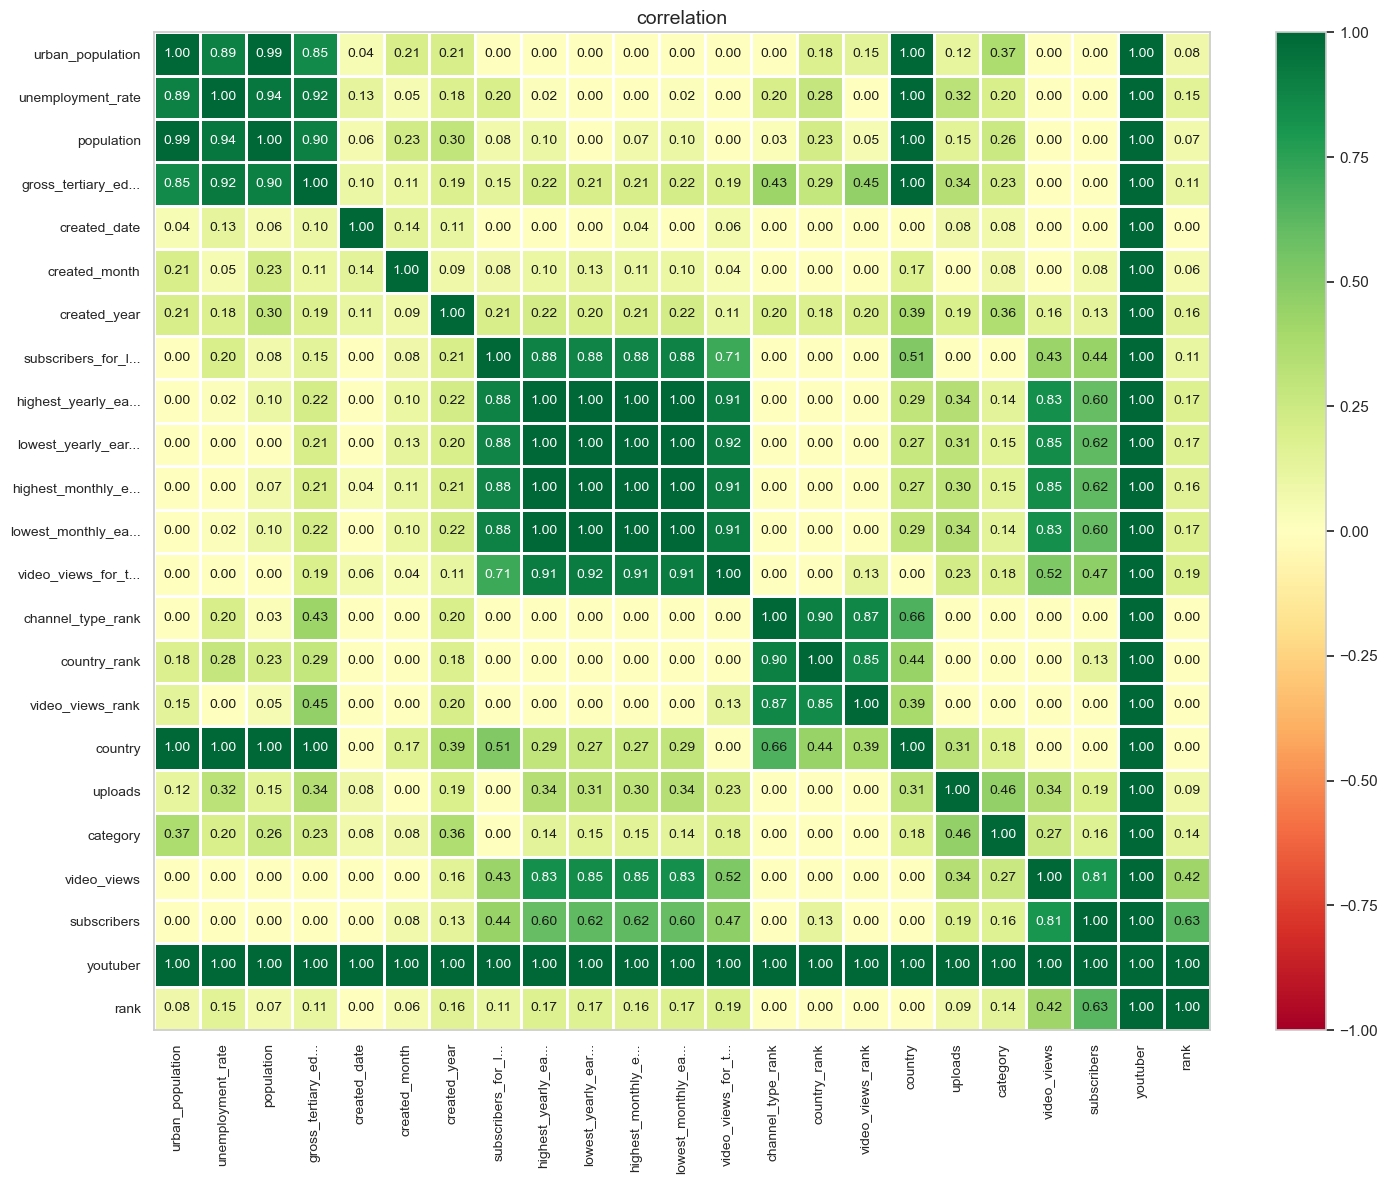

In [86]:
phik_overview = df.phik_matrix()
plot_correlation_matrix(phik_overview.values, x_labels = phik_overview.columns, y_labels = phik_overview.index, figsize = (15, 12))

<ul>Видим несколько групп тесно взаимосвязанных друг с другом групп показателей:
    <li>Группа 1:
        <ul>
            <li>gross_tertiary_education_enrollment_(%)</li>
            <li>population</li>
            <li>unemployment_rate</li>
            <li>urban_population;</li>
        </ul>
    </li>
    <li>Группа 2:
        <ul>
            <li>subscribers_for_last_30_days</li>
            <li>lowest_yearly_earnings</li>
            <li>highest_yearly_earnings</li>
            <li>lowest_monthly_earnings</li>
            <li>highest_monthly_earnings</li>
            <li>video_views_for_the_last_30_days</li>
            <li>video_views;</li>
        </ul>
    </li>
    <li>Группа 3:
        <ul>
            <li>country_rank</li>
            <li>channel_type_rank</li>
            <li>video_views_rank;</li>
        </ul>
    </li>
    <li>Группа 4:
        <ul>
            <li>youtuber (однозначно описывает каждую строку)</li>
        </ul>
    </li>
</ul>
Из каждой группы оставим по одному показателю с наибольшим процентом заполнения:

In [88]:
df_short = df.drop(columns = ['gross_tertiary_education_enrollment_(%)',
                              'urban_population',
                              'unemployment_rate',
                              'subscribers_for_last_30_days',
                              'lowest_yearly_earnings',
                              'lowest_monthly_earnings',
                              'highest_monthly_earnings',
                              'video_views',
                              'video_views_for_the_last_30_days',
                              'country_rank',
                              'channel_type_rank',
                              'youtuber'
                             ],
                   axis = 1
                  )

interval columns not set, guessing: ['rank', 'subscribers', 'uploads', 'video_views_rank', 'highest_yearly_earnings', 'created_year', 'created_date', 'population']


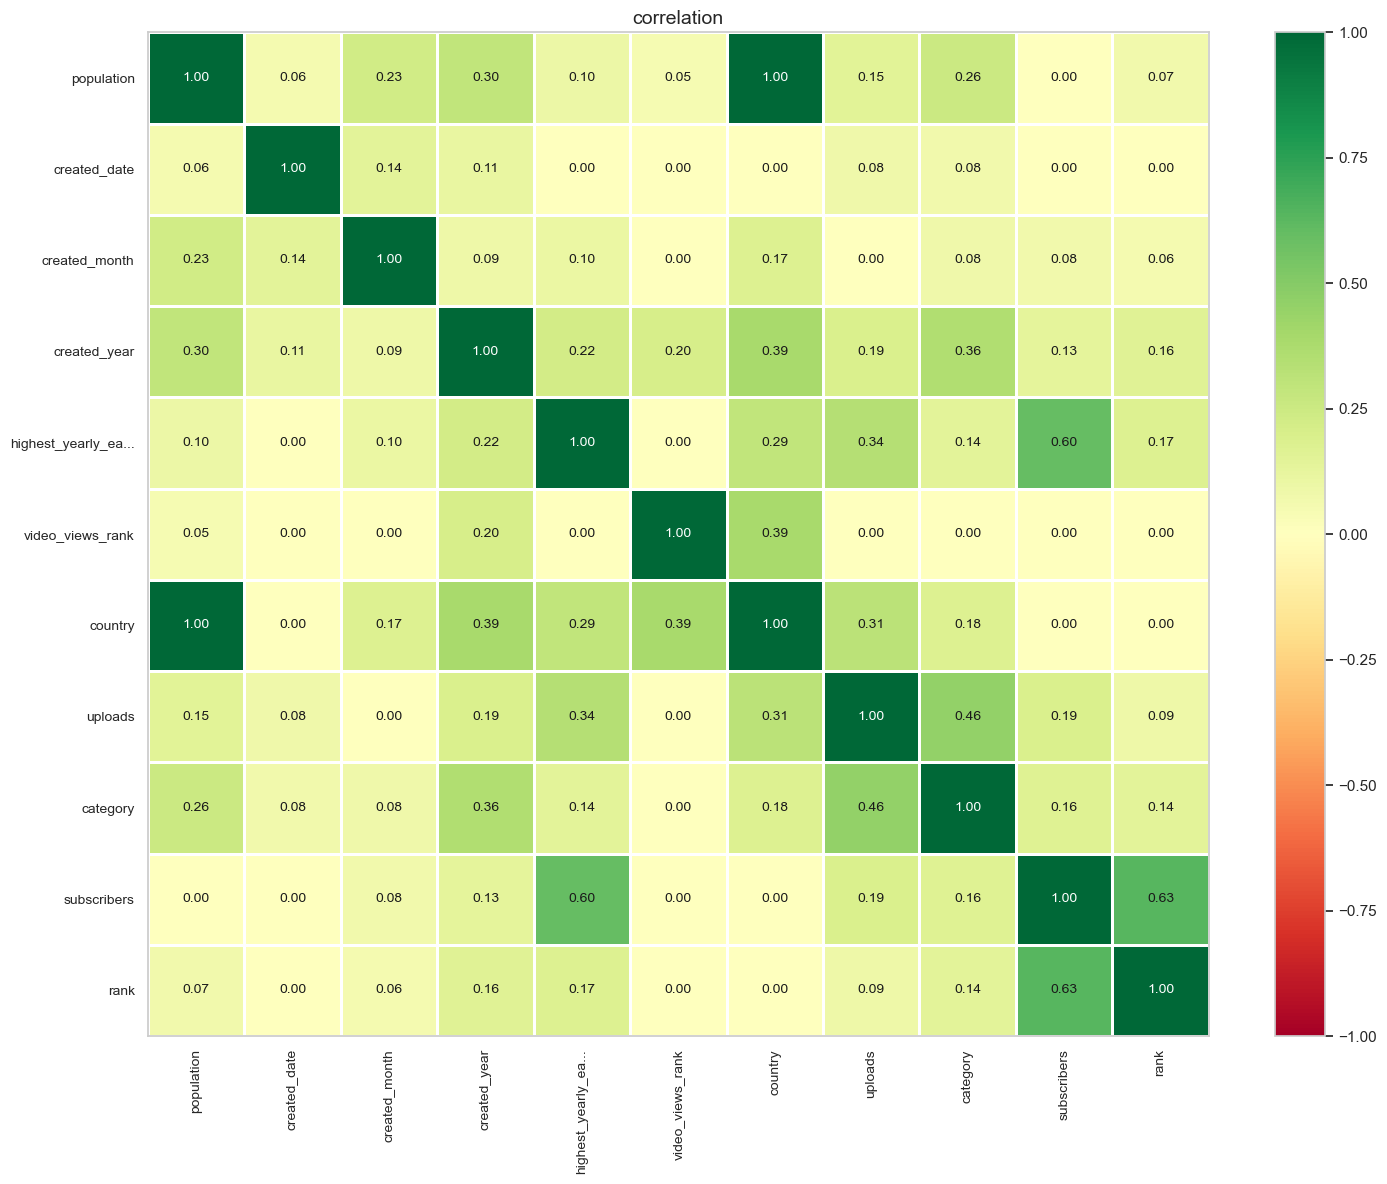

In [89]:
phik_overview = df_short.phik_matrix()
plot_correlation_matrix(phik_overview.values, x_labels = phik_overview.columns, y_labels = phik_overview.index, figsize = (15, 12))

<tr>Из итоговой матрицы корреляции видно, что:
    <li>Население страны напрямую связано с ее названием (что логично);</li>
    <li>Годовая прибыль от канала тесно связана с количеством подписчиков;</li>
    <li>Ранк канала также тесно связан с количеством подписчиков;</li>
    <li>Существует некая взаимосвязь между количеством залитого на канал контента и категорией канала;</li>
</tr>


Посмотрим на доверительный интервал показателя количества подписчиков:

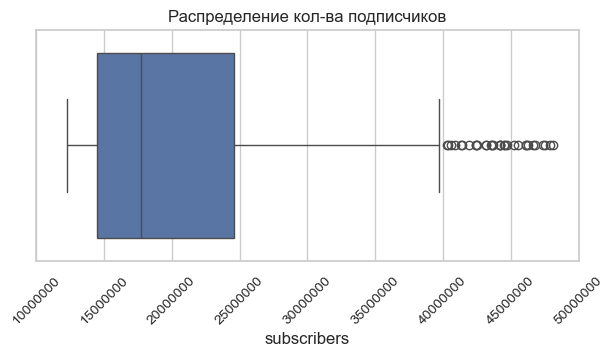

In [92]:
plt.figure(figsize = (7, 3))
plt.title('Распределение кол-ва подписчиков')
plt.ticklabel_format(axis = 'x', style = 'plain')
plt.tick_params(axis = 'x', labelsize = 10, rotation = 45)
plt.xlim(10**7, 0.5*10**8)
sns.boxplot(data = df_short, x = 'subscribers')
plt.show()

Видно, что после 40 млн. присутствуют выбросы.

Построим графики корреляции показателей для определения направления и характера корреляции:

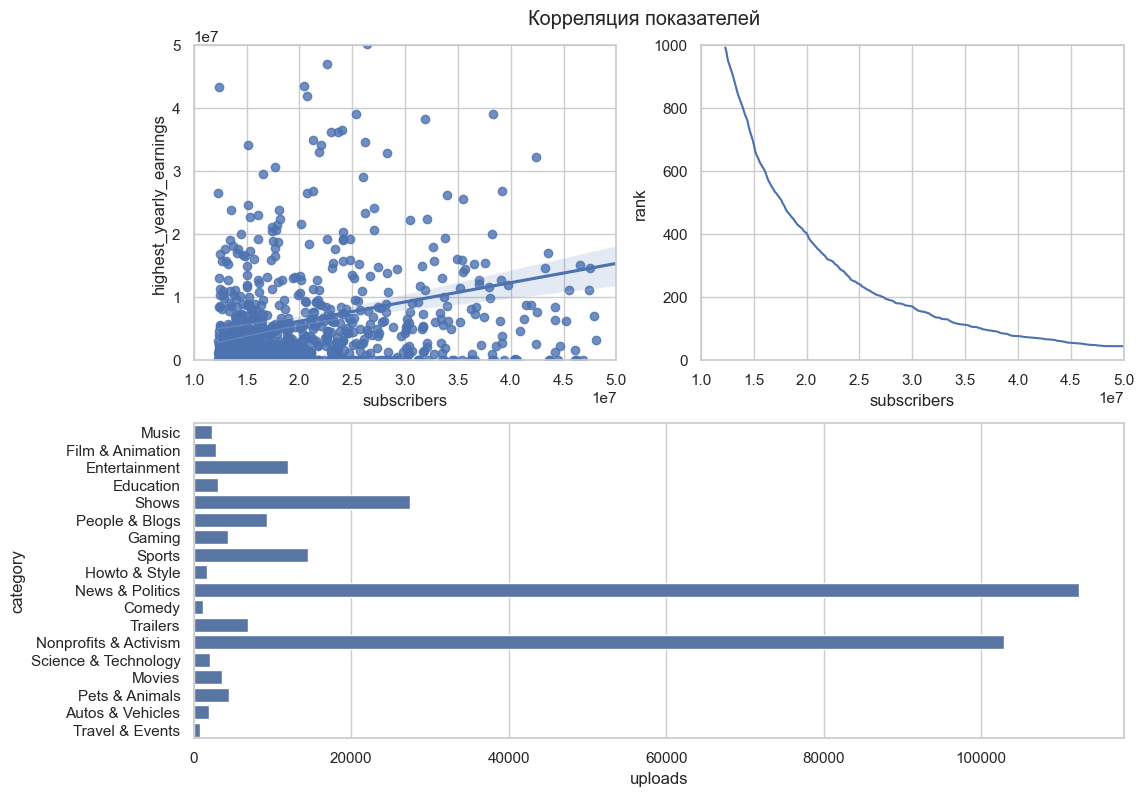

In [95]:
fig = plt.figure(figsize = (12, 9))
plt.suptitle('Корреляция показателей', y = 0.92)
fig.tight_layout()

ax1 = plt.subplot2grid(shape = (2, 2), loc = (0, 0), rowspan = 1, colspan = 1)
ax2 = plt.subplot2grid(shape = (2, 2), loc = (0, 1), rowspan = 1, colspan = 1)
ax3 = plt.subplot2grid(shape = (2, 2), loc = (1, 0), rowspan = 1, colspan = 2)

sns.regplot(data = df_short, x = 'subscribers', y = 'highest_yearly_earnings', ax = ax1)
sns.lineplot(data = df_short, x = 'subscribers', y = 'rank', ax = ax2)
sns.barplot(data = df_short, y = 'category', x = 'uploads', ci = None, ax = ax3)

ax1.set_xlim(10**7, 0.5*10**8)
ax1.set_ylim(0, 0.5*10**8)
ax2.set_xlim(10**7, 0.5*10**8)
ax2.set_ylim(0, 1000)

plt.show()

<tr>Из графиков выше видно:
    <li>Между показателями годового дохода <i>highest_yearly_earnings</i> и количеством подписчиков <i>subscribers</i> можно просмотреть слабо выраженную положительную корреляцию;</li>
    <li>Между показателями ранка <i>rank</i> и количеством подписчиков <i>subscribers</i> просматривается отрицательная корреляция (чем больше подписчиков, тем ниже ранк);</li>
    <li>Наибольший объем закачаннного контента наблюдается в категориях "News & Politics", "Nonprofits & Activism", "Shows";</li>
</tr>

Посмотрим на изменение показателей с течением времени. В качестве оцениваемого интервала возьмем интервал с 2000 года по н.в.:

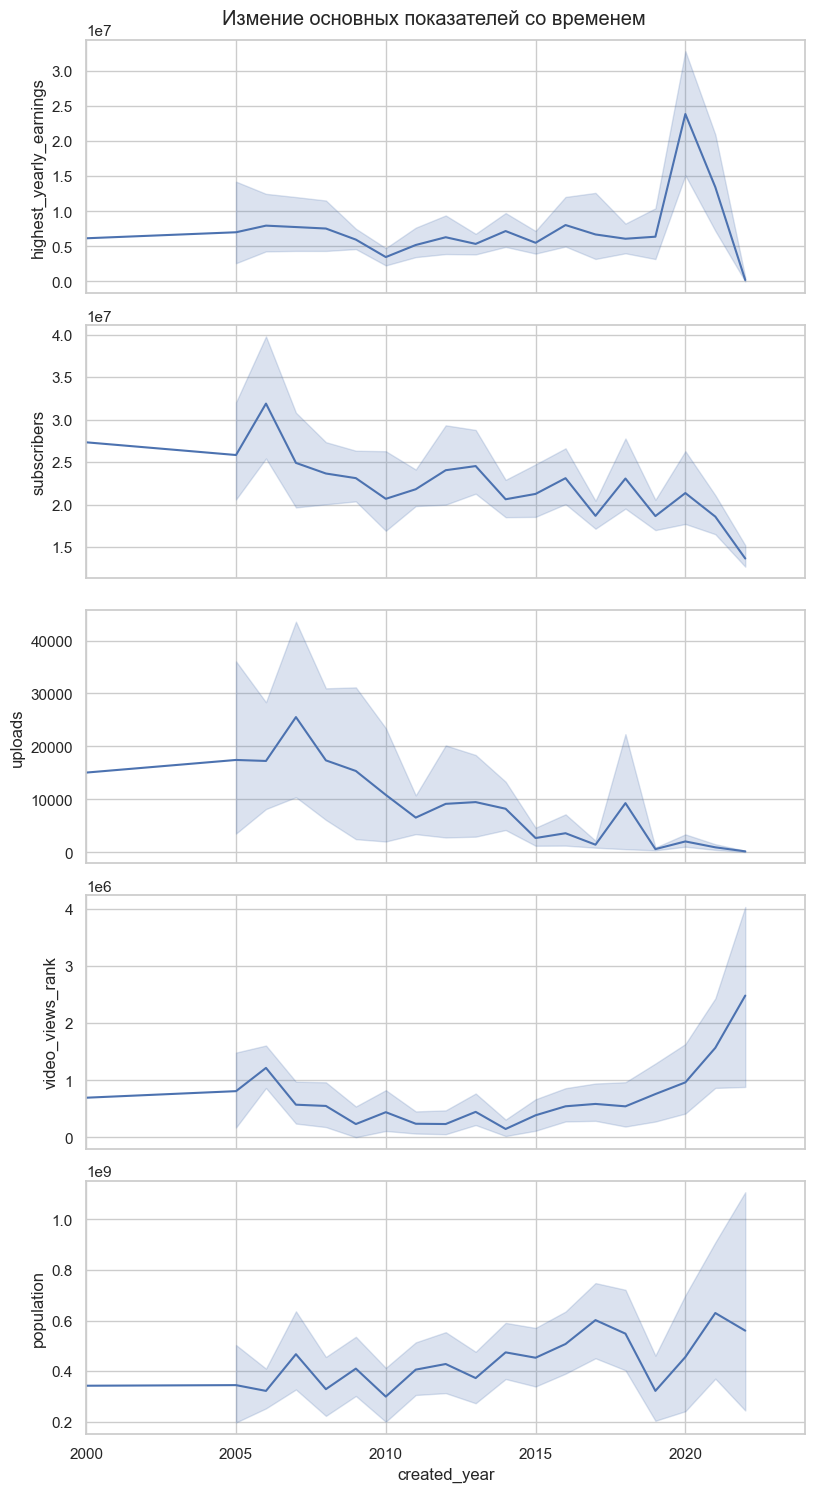

In [98]:
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (8, 15), sharex = True)
plt.suptitle('Измение основных показателей со временем')
fig.tight_layout()

sns.lineplot(data = df_short, x = 'created_year', y = 'highest_yearly_earnings', ax = ax[0])
sns.lineplot(data = df_short, x = 'created_year', y = 'subscribers', ax = ax[1])
sns.lineplot(data = df_short, x = 'created_year', y = 'uploads', ax = ax[2])
sns.lineplot(data = df_short, x = 'created_year', y = 'video_views_rank', ax = ax[3])
sns.lineplot(data = df_short, x = 'created_year', y = 'population', ax = ax[4])

ax[4].set_xlim(2000, 2024)

plt.show()

<tr>Из графиков видно, что:
    <li>наблюдается рост показателей дохода, рейтингов каналов, а также населения городов;</li>
    <li>показатели количества подписчиков и закачанного на каналы контента наоборот снижается;</li>
</tr>
Также можно заметить, что после 2020 года наблюдается значительный спад количества подписчиков и доходов. Что может свидетельствовать о спаде популярности интернет каналов на youtube, либо что после 2020 в наборе данных не хватает.

<ol><b>В результате проведенного EDA напишем по крайней мере 6 вопросов, на которые получили ответы:</b>:
    <li>Пять самых распространенных категорий каналов:
        <ul>
            <li>Entertainment</li>
            <li>Music</li>
            <li>People & Blogs</li>
            <li>Gaming</li>
            <li>Comedy</li>
        </ul>
    </li>
    <li>Пять стран с самым большим кол-вом каналов:
        <ul>
            <li>United States</li>
            <li>India</li>
            <li>Brazil</li>
            <li>United Kingdom</li>
            <li>Mexico</li>
        </ul>
    </li>
    <li>Взаимосвязь кол-ва подписчиков и дохода от канала:
         <ul><li>Прямая корреляция - чем больше подписчиков, тем больше доход;</li></ul>
    </li>
    <li>Взаимосвязь кол-ва подписчиков и ранка канала:
         <ul><li>Обратная корреляция - чем больше подписчиков, тем ниже ранк;</li></ul>
    </li>
    <li>Категории каналов, на которые больше всего загружают контент:
        <ul>
            <li>News & Politics</li>
            <li>Nonprofits & Activism</li>
            <li>Shows</li>
        </ul>
    </li>
    <li>Изменение показателей со временем:
        <ul>
            <li>Доход, рейтинг каналов, размер населения городов растет</li>
            <li>количество подписчиков и размер закачанного на каналы контента уменьшается</li>
        </ul>
    </li>
</ol>

# Задание 2. Корреляционный анализ

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Оставим столбцы *subscribers* и *video_views*:

In [104]:
df_corr = df[['subscribers', 'video_views']]
df_corr.head()

,subscribers,video_views
0,245000000,"228,000,000,000.00"
1,170000000,0.00
2,166000000,"28,368,841,870.00"
3,162000000,"164,000,000,000.00"
4,159000000,"148,000,000,000.00"


В полученном наборе данных нет пустых значений (990 атрибутов не пустые из 990 строк):

In [106]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 994
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subscribers  990 non-null    int64  
 1   video_views  990 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 23.2 KB


Уберем строки без просмотров:

In [108]:
df_corr_1 = df_corr[df_corr.video_views > 0]

В результате осталось 982 значения:

In [110]:
df_corr_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 994
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subscribers  982 non-null    int64  
 1   video_views  982 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 23.0 KB


Коэффициент корреляции Пирсона показывает тесную положительную взаимосвязь между признаками:

In [112]:
df_corr_1.corr(method = 'pearson')

,subscribers,video_views
subscribers,1.00,0.82
video_views,0.82,1.00


Определим признак и целевую переменную:

In [657]:
X = df_corr_1[['video_views']]
y = df_corr_1['subscribers']

Разделим выборку на тренировочную и тестовую в пропорциях 80% на 20%:

In [543]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

Построим модель линейной регрессии:

In [545]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Посмотрим на коэффициенты:

In [547]:
print(f'Coef = {model.coef_}, intercept = {model.intercept_}')

Coef = [0.00094193], intercept = 12218410.830679804


Уравнение линейной регрессии: $$subscribers = 0.0009*video\_views + 12218411$$

Посчитаем целевые показатели подписчиков по уравнению ленейной регрессии:

In [549]:
y_pred = model.predict(X_test)

Построим графики фактического распределения и наложим линию тренда по линейной регрессии:

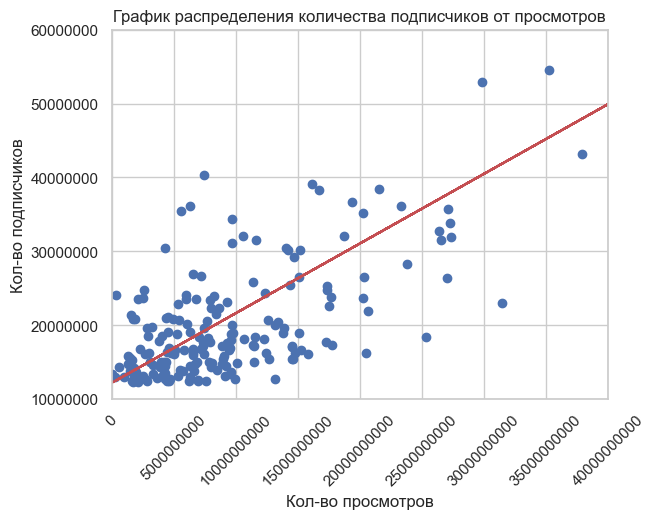

In [551]:
plt.title('График распределения количества подписчиков от просмотров')
plt.ticklabel_format(style = 'plain')

plt.xticks(rotation = 45)
plt.xlim(0, 0.4*10**11)
plt.ylim(10**7, 0.6*10**8)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c = 'r')

plt.xlabel('Кол-во просмотров')
plt.ylabel('Кол-во подписчиков')

plt.show()

Посчитаем точность модели:

In [553]:
model.score(X_test, y_test)

0.8485491107673164

Коэффициент детерминации R2 = 0.85 показывает, что модель достаточно хорошо объясняет вариации исходных данных.

Посмотрим на распределение остатков для оценки качества регрессии:

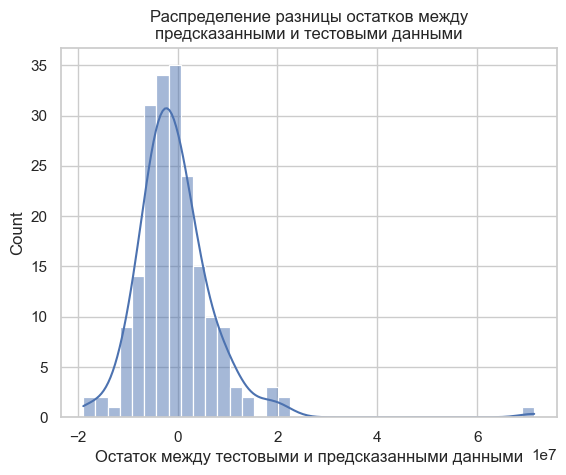

In [555]:
plt.title('Распределение разницы остатков между\nпредсказанными и тестовыми данными')
plt.xlabel('Остаток между тестовыми и предсказанными данными')
sns.histplot(x = y_test - y_pred, kde = True)
plt.show()

Видно, что распределение остатков похоже на нормальное. Однако есть выброс в пределах 6.5*10**7.

In [557]:
df_test = pd.concat([X_test, y_test], axis = 1).reset_index()
df_test = pd.concat([df_test, pd.Series(y_pred)], axis = 1)
df_test.columns = ['index', 'video_views', 'subscribers_test', 'subscribers_pred']
df_test['diff'] = df_test['subscribers_test'] - df_test['subscribers_pred']

In [559]:
df_test.iloc[df_test[df_test['diff'] > 6.5*10**7].index[0]:df_test[df_test['diff'] > 6.5*10**7].index[0]+1]

,index,video_views,subscribers_test,subscribers_pred,diff
99,7,"29,058,044,447.00",111000000,"39,589,170.84","71,410,829.16"


Теперь построим аналогичную модель без удаления строк с нулевыми просмотрами:

In [561]:
df_corr.corr(method = 'pearson')

,subscribers,video_views
subscribers,1.00,0.75
video_views,0.75,1.00


Видно, что коэффициент корреляции уменьшился по сравнению с прошлым вариантом.

In [563]:
X = df_corr[['video_views']]
y = df_corr['subscribers']

In [565]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [567]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [569]:
print(f'Coef = {model.coef_}, intercept = {model.intercept_}')

Coef = [0.00092489], intercept = 12834131.744412083


Уравнение линейной регрессии: $$subscribers = 0.0009*video\_views + 12834132$$

In [571]:
y_pred = model.predict(X_test)

In [573]:
model.score(X_test, y_test)

0.7598577508144264

Значение коэффициента детерминации модели чуть уменьшилось до 0.76. Хотя модель по прежнему хорошо описывает исходные данные.

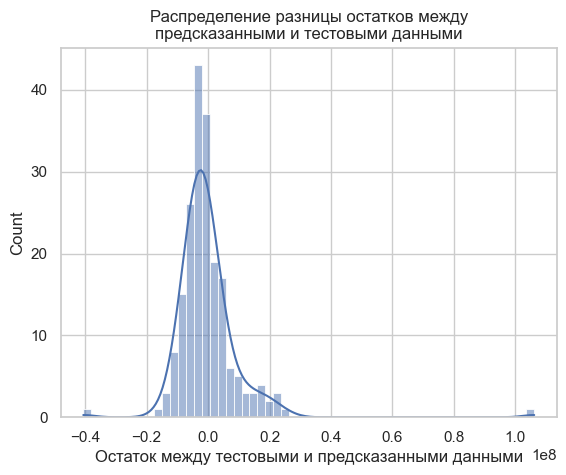

In [575]:
plt.title('Распределение разницы остатков между\nпредсказанными и тестовыми данными')
plt.xlabel('Остаток между тестовыми и предсказанными данными')
sns.histplot(x = y_test - y_pred, kde = True)
plt.show()

Получается, что нулевые значения уменьшают точность модели.

### Предполагая, что связи между данными могут быть не линейными, построимо полиномиальную модель:

In [659]:
from sklearn.preprocessing import PolynomialFeatures

In [661]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

poly = PolynomialFeatures(degree = 3)

X_train_poly = poly.fit_transform(X_train)
#poly.fit(X_train_poly, y_train)
X_test_poly = poly.fit_transform(X_test)
#poly.fit(X_test_poly, y_test)

model_2 = LinearRegression()
model_2.fit(X_train_poly, y_train)

y_pred = model_2.predict(X_test_poly)

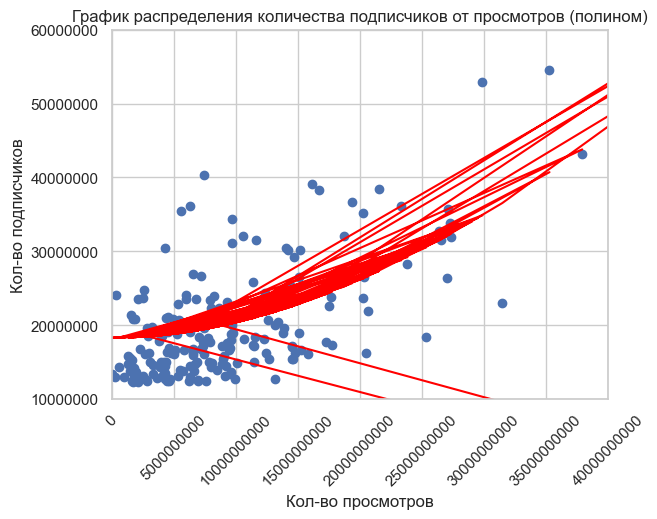

In [663]:
plt.title('График распределения количества подписчиков от просмотров (полином)')

plt.ticklabel_format(style = 'plain')

plt.xticks(rotation = 45)
plt.xlim(0, 0.4*10**11)
plt.ylim(10**7, 0.6*10**8)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = 'red')

plt.xlabel('Кол-во просмотров')
plt.ylabel('Кол-во подписчиков')

plt.show()

# Задание 3. Классификация

Как видно из графиков выше, самыми популярными категориями каналов являются: *Entertainment* и *Music*. Отфильтруем набор данных по ним и удалим каналы, где количество просмотров равно 0:

In [388]:
df_class = df[(df['category'].isin(['Entertainment', 'Music'])) & (df['video_views'] > 0)]
df_class['category'].value_counts()

category
Entertainment    240
Music            200
Name: count, dtype: int64

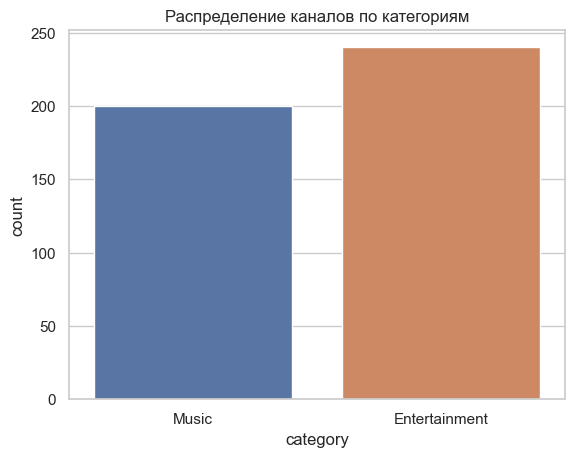

In [390]:
plt.title('Распределение каналов по категориям')
sns.countplot(data = df_class, x = 'category', hue = 'category')
plt.show()

Из графика выше видно, что выборка более-менее сбалансирована по категориям *Entertainment* и *Music*.

Закодируем значения категорий числовыми значениями:

In [392]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_class['category'] = le.fit_transform(df_class['category'])
df_class.head()

,rank,youtuber,subscribers,video_views,category,uploads,country,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment_(%),population,unemployment_rate,urban_population
0,1,T-Series,245000000,"228,000,000,000.00",1,20082,India,1.00,1.00,1.00,"2,258,000,000.00","564,600.00","9,000,000.00","6,800,000.00","108,400,000.00","2,000,000.00","2,006.00",Mar,13.00,28.10,"1,366,417,754.00",5.36,"471,031,528.00"
2,3,MrBeast,166000000,"28,368,841,870.00",0,741,United States,48.00,1.00,1.00,"1,348,000,000.00","337,000.00","5,400,000.00","4,000,000.00","64,700,000.00","8,000,000.00","2,012.00",Feb,20.00,88.20,"328,239,523.00",14.70,"270,663,028.00"
9,10,Vlad and Niki,98900000,"77,180,169,894.00",0,574,United States,8.00,5.00,6.00,"580,574,000.00","145,100.00","2,300,000.00","1,700,000.00","27,900,000.00","600,000.00","2,018.00",Apr,23.00,88.20,"328,239,523.00",14.70,"270,663,028.00"
10,11,Zee Music Company,96700000,"57,856,289,381.00",1,8548,India,12.00,3.00,2.00,"803,613,000.00","200,900.00","3,200,000.00","2,400,000.00","38,600,000.00","1,100,000.00","2,014.00",Mar,12.00,28.10,"1,366,417,754.00",5.36,"471,031,528.00"
17,18,BANGTANTV,75600000,"20,826,993,957.00",1,2281,South Korea,112.00,2.00,4.00,"168,290,000.00","42,100.00","673,200.00","504,900.00","8,100,000.00","400,000.00","2,012.00",Dec,17.00,94.30,"51,709,098.00",4.15,"42,106,719.00"


Т.к. размерность полей *video_views*, *subscribers* и *uploads* совпадает, то нет необходимости делать масштабирование данных.

Сформируем тренировочную и тестовую выборки:

In [402]:
X_train, X_test, y_train, y_test = train_test_split(df_class[['video_views', 'subscribers', 'uploads']], 
                                                    df_class['category'],
                                                    test_size = 0.2,
                                                    random_state = 13,
                                                    stratify = df_class['category']
                                                   )

Построим модель логистической регрессии:

In [404]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [406]:
lr_model = LogisticRegression(random_state = 13)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

Рассчитаем точность и выведем результаты на тепловой карте:

In [408]:
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.60      0.65      0.62        48
           1       0.53      0.47      0.50        40

    accuracy                           0.57        88
   macro avg       0.56      0.56      0.56        88
weighted avg       0.57      0.57      0.57        88



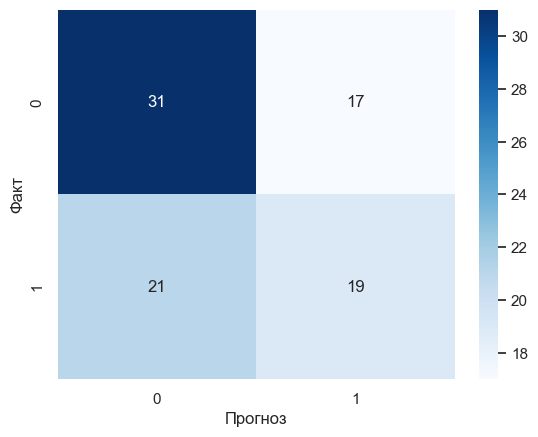

In [410]:
cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.xlabel('Прогноз')
plt.ylabel('Факт')
plt.show()

По коэффициентам f1-score (0.62 b 0.50) можно сделать вывод, что качество модели среднее.

Посмотрим, как изменится точность модели, если выберем другие столбцы в качестве признаков:

In [419]:
df_class.dropna(subset = ['population', 'highest_yearly_earnings', 'rank'], inplace = True)

X_train, X_test, y_train, y_test = train_test_split(df_class[['population', 'highest_yearly_earnings', 'rank']], 
                                                    df_class['category'],
                                                    test_size = 0.2,
                                                    random_state = 13,
                                                    stratify = df_class['category']
                                                   )
lr_model = LogisticRegression(random_state = 13)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        43
           1       1.00      0.03      0.05        36

    accuracy                           0.56        79
   macro avg       0.78      0.51      0.38        79
weighted avg       0.76      0.56      0.41        79



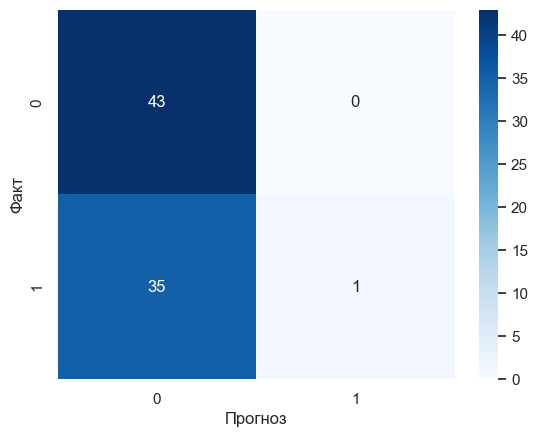

In [421]:
cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.xlabel('Прогноз')
plt.ylabel('Факт')
plt.show()

Качество распознования класса 0 увеличилось (f1_scere = 0.71). Но 1 класс распознан только в одном случае (f1_scere = 0.05).<br/>В данном случае модель бесполезна, т.к. по сути всегда предсказывает один и тот же класс.

In [427]:
df_class.dropna(subset = ['population', 'rank'], inplace = True)

X_train, X_test, y_train, y_test = train_test_split(df_class[['population', 'rank']], 
                                                    df_class['category'],
                                                    test_size = 0.2,
                                                    random_state = 13,
                                                    stratify = df_class['category']
                                                   )
lr_model = LogisticRegression(random_state = 13)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        43
           1       0.00      0.00      0.00        36

    accuracy                           0.54        79
   macro avg       0.27      0.50      0.35        79
weighted avg       0.30      0.54      0.38        79



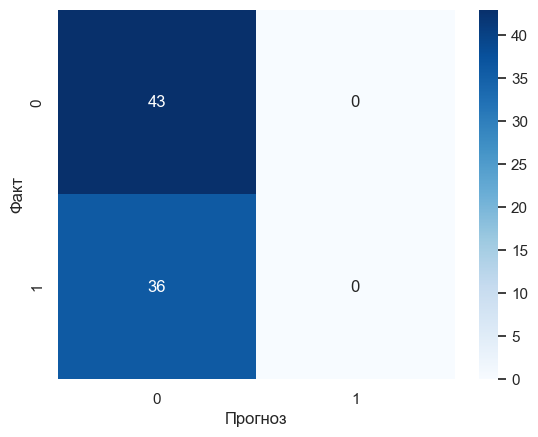

In [429]:
cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.xlabel('Прогноз')
plt.ylabel('Факт')
plt.show()

Аналогично прошлому варианту.